In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


<ipython-input-1-1e0017664fd4>:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [4]:
# Import the data 
ltc_com = pd.read_csv('../data/BC/bc_ltc_complete_sep18.csv')
ltc_com.info()
# ltc_com.columns.values
# for each in ltc.columns.values:
#     print(each)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FACILITY_NAME             294 non-null    object 
 1   HCC_CODE                  294 non-null    object 
 2   HLTH_AUTH                 294 non-null    object 
 3   OWNERSHIP                 294 non-null    object 
 4   STREET_ADDRESS            294 non-null    object 
 5   CITY                      294 non-null    object 
 6   POSTAL                    294 non-null    object 
 7   REGULATION                294 non-null    object 
 8   ACCRED_STATUS             294 non-null    object 
 9   BEDS_TOTAL                294 non-null    int64  
 10  INCIDENT_OUTBREAK_100     268 non-null    float64
 11  AGE                       287 non-null    float64
 12  FEMALE                    287 non-null    float64
 13  AGE_85_PLUS               287 non-null    float64
 14  AGE_UNDER_

In [5]:
ltc_com[ltc_com['FACILITY_NAME'].str.contains('Special Unit', regex=False, na=False)]
# ltc_fil['REGULATION'].value_counts()

,FACILITY_NAME,HCC_CODE,HLTH_AUTH,OWNERSHIP,STREET_ADDRESS,CITY,POSTAL,REGULATION,ACCRED_STATUS,BEDS_TOTAL,INCIDENT_OUTBREAK_100,AGE,FEMALE,AGE_85_PLUS,AGE_UNDER_65,STAY_LENGTH,DEPRESSION,ADL_DEPENDENT,CPS_SEVERE,DEMENTIA,ABS_PHYS_ABUSIVE,ISE,ISE_LOW,CMI,THERAPY_PT,THERAPY_RT,THERAPY_OT,MEDS_DEPRESSION,MEDS_ANTIPSYCHOTICS,RESTRAINTS,INSPECTIONS,latitude,longitude,Total Confirmed Cases,Total Deaths,outbreak,rooms_semi_binary,rooms_multi_binary,rooms_shared,resident_council,family_council,res_fam_council,beds_privatebinary,complaints_100,sub_complaints_100,incident_100sumXoutbreak,infractions_disease_100,infractions_100Xdisease


In [6]:
ltc_fil = ltc_com
# Review NH facilities under the hospital act
len(ltc_fil.loc[(ltc_fil['HLTH_AUTH'] == 'Northern Health')])
# len(ltc_fil.loc[(ltc_fil['HLTH_AUTH'] == 'Northern Health') & (ltc_fil['REGULATION'].str.contains('Hospital'))]) 

24

In [7]:
# Review VIHA homes under the hospital act
len(ltc_fil.loc[(ltc_fil['HLTH_AUTH'] == 'Vancouver Island Health')])
# len(ltc_fil.loc[(ltc_fil['HLTH_AUTH'] == 'Vancouver Island Health') & (ltc_fil['REGULATION'].str.contains('Hospital'))])

59

In [8]:
# Remove facilities in Northern Health
# All homes in NH are operated by the HA except for 2
ltc_xNH = ltc_fil[~ltc_fil.HLTH_AUTH.str.contains("Northern", na=False)]
# ltc_noNH.info()

# Remove facilities in Island Health
ltc_xVIHA = ltc_fil[~ltc_fil.HLTH_AUTH.str.contains("Island", na=False)]
# ltc_noVIHA.info()

ltc_xNHorVIHA = ltc_xNH[~ltc_xNH.HLTH_AUTH.str.contains("Island", na=False)]

## Filter for homes in the Lower Mainland

1. An argument can be made that homes in IH, VIHA and NH are geographically distinct from those in Fraser and VCH (lower mainland)

2. Homes regulated under the Hospital Act in NH and VIHA are missing data
    - Complaints data for Hospital Act facilities in Northern Health are not available 
        - 12/24 homes in NH
        - If we want to include complaints, we will have to remove homes in NH
    - Incident data for Hospital Act facilities in Vancouver Island Health are not available 
        - 22/59 homes in VIHA
        - If we want to include incident data, we will have to remove homes in VIHA


In [9]:
# Dataset with NH, VIHA and IH homes removed
ltc_mainland = ltc_xNHorVIHA[~ltc_xNHorVIHA.HLTH_AUTH.str.contains("Interior", na=False)]
ltc_mainland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 3 to 293
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FACILITY_NAME             134 non-null    object 
 1   HCC_CODE                  134 non-null    object 
 2   HLTH_AUTH                 134 non-null    object 
 3   OWNERSHIP                 134 non-null    object 
 4   STREET_ADDRESS            134 non-null    object 
 5   CITY                      134 non-null    object 
 6   POSTAL                    134 non-null    object 
 7   REGULATION                134 non-null    object 
 8   ACCRED_STATUS             134 non-null    object 
 9   BEDS_TOTAL                134 non-null    int64  
 10  INCIDENT_OUTBREAK_100     132 non-null    float64
 11  AGE                       132 non-null    float64
 12  FEMALE                    132 non-null    float64
 13  AGE_85_PLUS               132 non-null    float64
 14  AGE_UNDER_

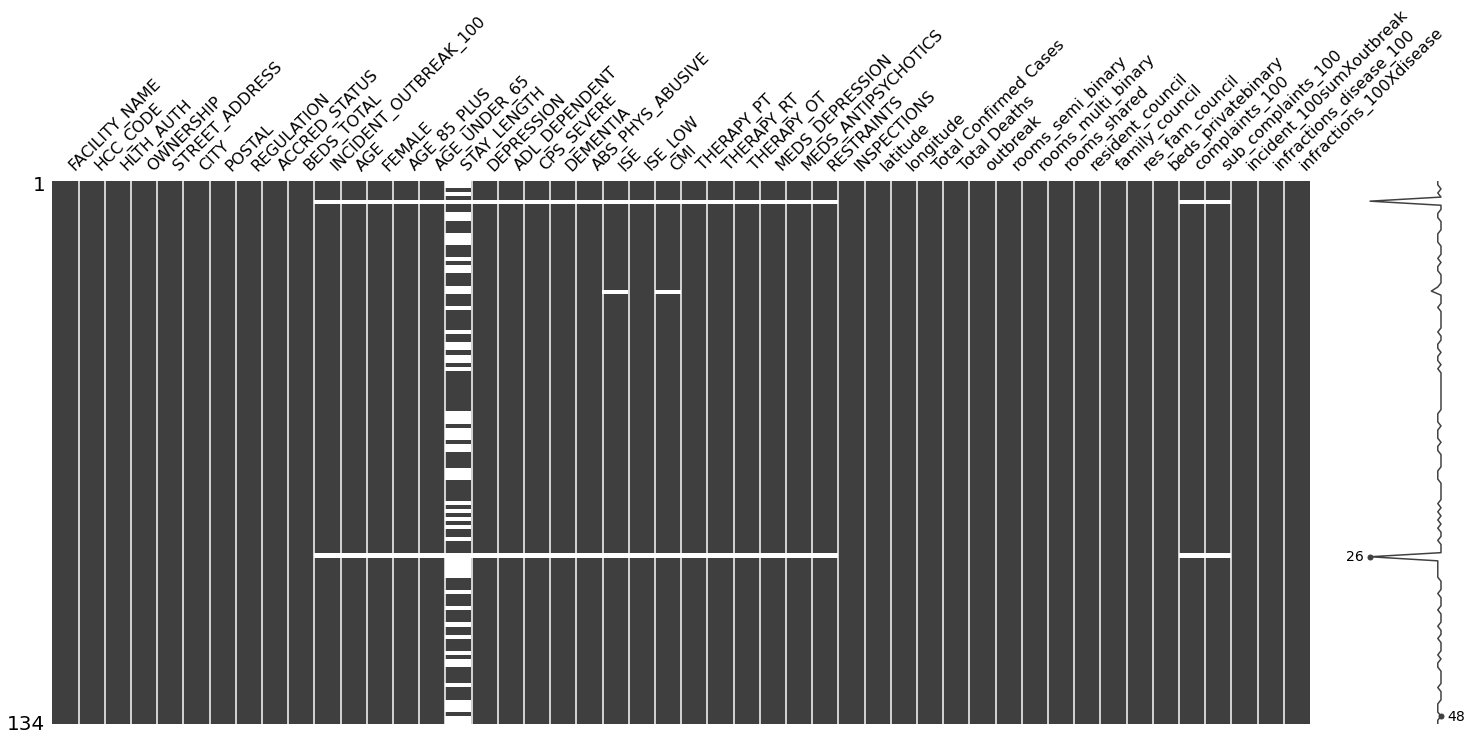

In [10]:
import missingno as msno
msno.matrix(ltc_mainland)

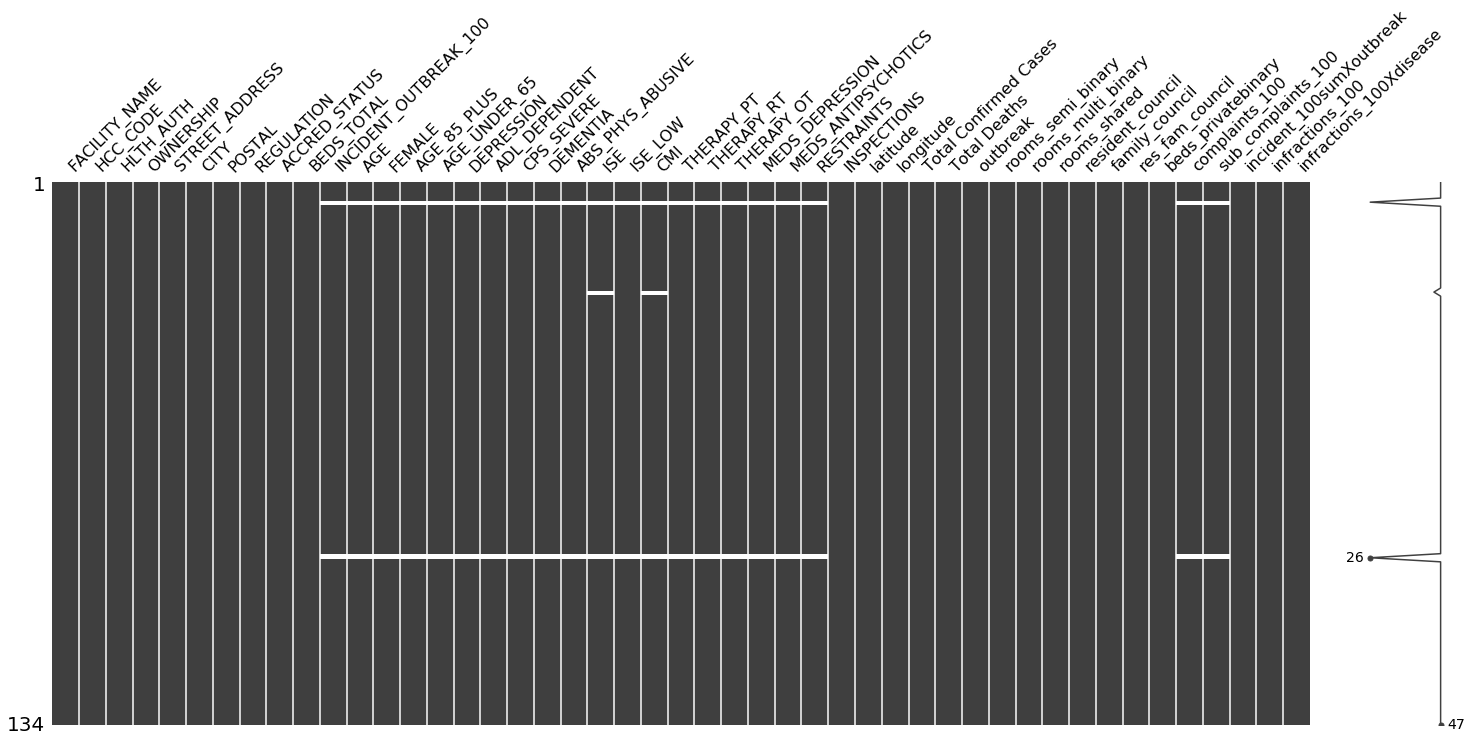

In [21]:
# Remove STAY_LENGTH covariate with many missing values
ltc_mainland.drop(['STAY_LENGTH'], axis = 1, inplace = True)

# # Remove CMI and ISE covariates with missing values for 3 homes
# ltc_mainland.drop(['CMI', 'ISE'], axis = 1, inplace = True)

# ltc_mainland = ltc_mainland.dropna(axis=1)
# ltc_mainland.info()

import missingno as msno
msno.matrix(ltc_mainland)

In [11]:
# Review 3 homes with missing values
ltc_mainland[ltc_mainland['ISE'].isnull()]

,FACILITY_NAME,HCC_CODE,HLTH_AUTH,OWNERSHIP,STREET_ADDRESS,CITY,POSTAL,REGULATION,ACCRED_STATUS,BEDS_TOTAL,INCIDENT_OUTBREAK_100,AGE,FEMALE,AGE_85_PLUS,AGE_UNDER_65,STAY_LENGTH,DEPRESSION,ADL_DEPENDENT,CPS_SEVERE,DEMENTIA,ABS_PHYS_ABUSIVE,ISE,ISE_LOW,CMI,THERAPY_PT,THERAPY_RT,THERAPY_OT,MEDS_DEPRESSION,MEDS_ANTIPSYCHOTICS,RESTRAINTS,INSPECTIONS,latitude,longitude,Total Confirmed Cases,Total Deaths,outbreak,rooms_semi_binary,rooms_multi_binary,rooms_shared,resident_council,family_council,res_fam_council,beds_privatebinary,complaints_100,sub_complaints_100,incident_100sumXoutbreak,infractions_disease_100,infractions_100Xdisease
13,Bella Coola General Hospital,9A8DC,Vancouver Coastal Health,HA,1025 Elcho Street,Bella Coola,V0T1C0,Hospital Act,Accredited,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,52.374176,-126.757950,0.0,0.0,0,0,0,0,1,1,1,0,NaN,NaN,0.0,0.0,0.000000
57,Delta View Habilitation Centre,9C280,Fraser Health,PFP,9341 Burns Drive,Delta,V4K3N3,Hospital Act,Accredited,80,0.0,79.0,66.7,33.3,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1.0,49.092204,-122.965047,0.0,0.0,0,1,0,1,1,1,1,1,0.0,0.0,6.3,0.0,0.000000
200,R. W. Large Memorial Hospital,9A773,Vancouver Coastal Health,HA,88 Waglisla Street,Bella Bella,V0T1Z0,Hospital Act,Accredited,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,52.161211,-128.143320,0.0,0.0,0,0,0,0,0,0,0,0,NaN,NaN,0.0,0.0,14.285714


In [13]:
# Remove remaining homes with missing values
# Note that Delta View is missing only CMI and ISE
ls =['Bella Coola General Hospital', 
     'Delta View Habilitation Centre',
     'R. W. Large Memorial Hospital']

ltc_mainland = ltc_mainland[~ltc_mainland['FACILITY_NAME'].isin(ls)]

In [14]:
ltc_mainland.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 3 to 293
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FACILITY_NAME             131 non-null    object 
 1   HCC_CODE                  131 non-null    object 
 2   HLTH_AUTH                 131 non-null    object 
 3   OWNERSHIP                 131 non-null    object 
 4   STREET_ADDRESS            131 non-null    object 
 5   CITY                      131 non-null    object 
 6   POSTAL                    131 non-null    object 
 7   REGULATION                131 non-null    object 
 8   ACCRED_STATUS             131 non-null    object 
 9   BEDS_TOTAL                131 non-null    int64  
 10  INCIDENT_OUTBREAK_100     131 non-null    float64
 11  AGE                       131 non-null    float64
 12  FEMALE                    131 non-null    float64
 13  AGE_85_PLUS               131 non-null    float64
 14  AGE_UNDER_

In [15]:
# Export mainland dataset
ltc_mainland.to_csv(r'../data/BC/ngan_bc_ltc_mainland.csv', index = False)

## Filter for homes in VCH, Fraser and IH


In [16]:
# Dataset with NH and VIHA homes removed
ltc_xNHorVIHA = ltc_xNH[~ltc_xNH.HLTH_AUTH.str.contains("Island", na=False)]
ltc_xNHorVIHA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 211 entries, 3 to 293
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FACILITY_NAME             211 non-null    object 
 1   HCC_CODE                  211 non-null    object 
 2   HLTH_AUTH                 211 non-null    object 
 3   OWNERSHIP                 211 non-null    object 
 4   STREET_ADDRESS            211 non-null    object 
 5   CITY                      211 non-null    object 
 6   POSTAL                    211 non-null    object 
 7   REGULATION                211 non-null    object 
 8   ACCRED_STATUS             211 non-null    object 
 9   BEDS_TOTAL                211 non-null    int64  
 10  INCIDENT_OUTBREAK_100     208 non-null    float64
 11  AGE                       208 non-null    float64
 12  FEMALE                    208 non-null    float64
 13  AGE_85_PLUS               208 non-null    float64
 14  AGE_UNDER_

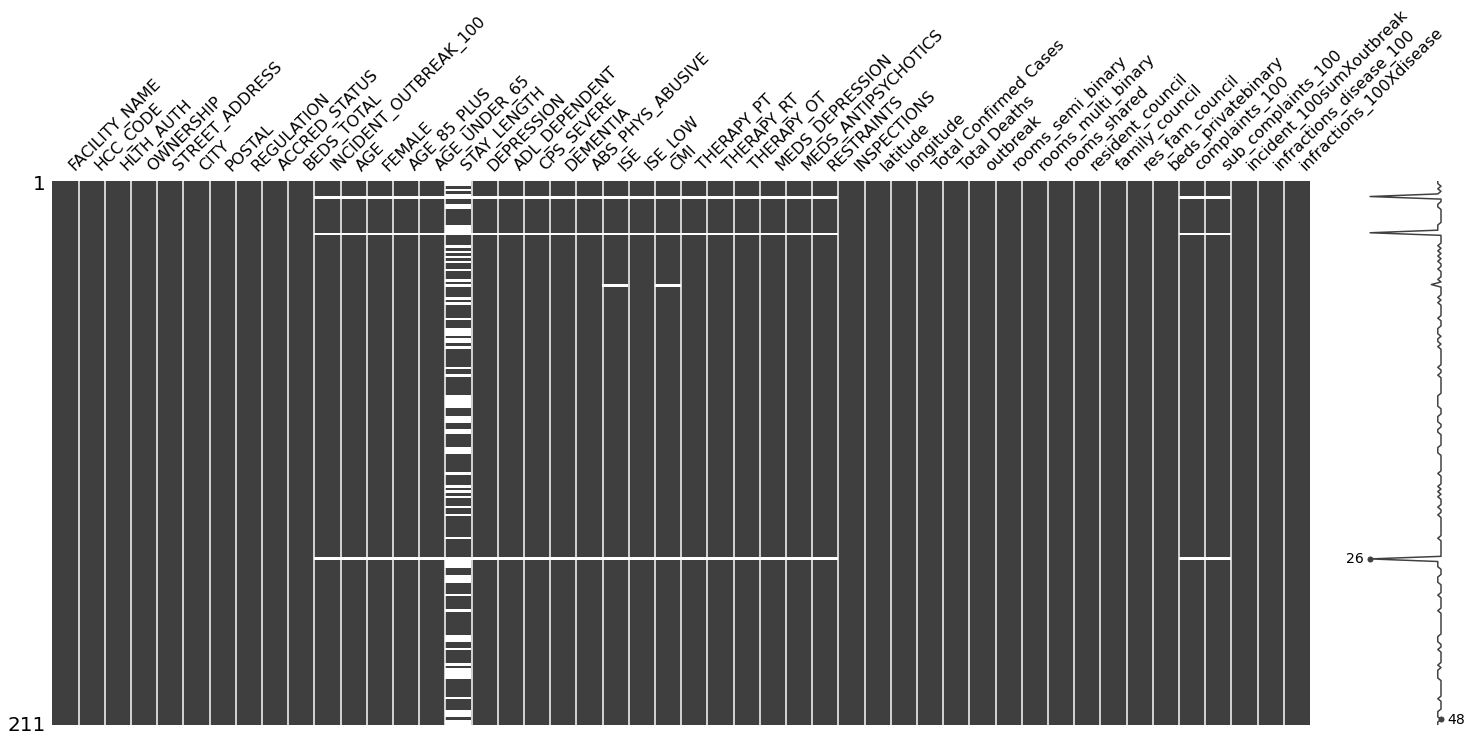

In [17]:
import missingno as msno
msno.matrix(ltc_xNHorVIHA)

/home/nganhien/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


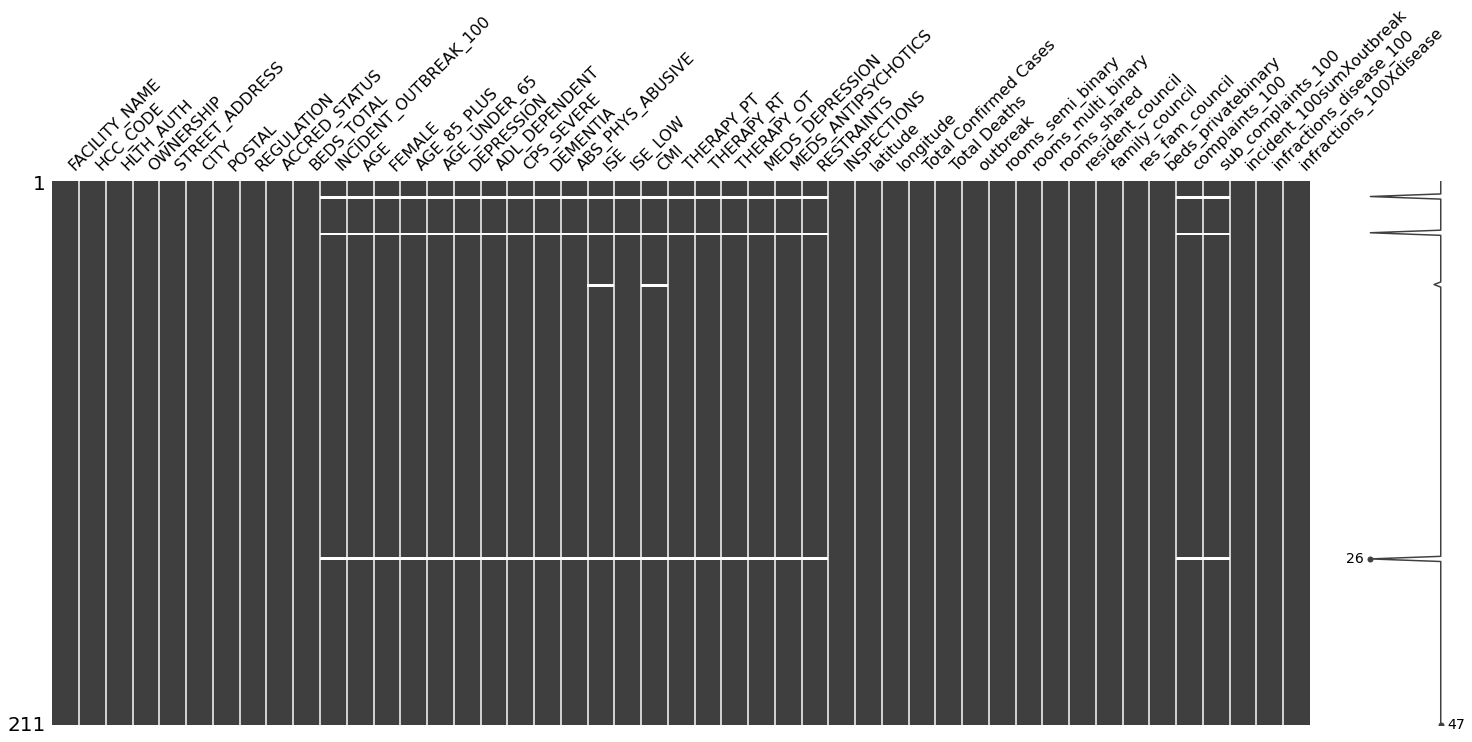

In [18]:
# Remove STAY_LENGTH covariate with many missing values
ltc_xNHorVIHA.drop(['STAY_LENGTH'], axis = 1, inplace = True)

# # Remove CMI and ISE covariates with missing values for 4 homes
# ltc_xNHorVIHA.drop(['CMI', 'ISE'], axis = 1, inplace = True)

import missingno as msno
msno.matrix(ltc_xNHorVIHA)

In [19]:
# Review 3 homes with missing values
# ltc_xNHorVIHA[ltc_xNHorVIHA['AGE'].isnull()]

# Remove 4 remaining homes with missing values
ls =['Bella Coola General Hospital', 
     'Delta View Habilitation Centre',
     'Cariboo Place',
     'R. W. Large Memorial Hospital']

ltc_xNHorVIHA = ltc_xNHorVIHA[~ltc_xNHorVIHA['FACILITY_NAME'].isin(ls)]

In [20]:
ltc_xNHorVIHA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 207 entries, 3 to 293
Data columns (total 47 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   FACILITY_NAME             207 non-null    object 
 1   HCC_CODE                  207 non-null    object 
 2   HLTH_AUTH                 207 non-null    object 
 3   OWNERSHIP                 207 non-null    object 
 4   STREET_ADDRESS            207 non-null    object 
 5   CITY                      207 non-null    object 
 6   POSTAL                    207 non-null    object 
 7   REGULATION                207 non-null    object 
 8   ACCRED_STATUS             207 non-null    object 
 9   BEDS_TOTAL                207 non-null    int64  
 10  INCIDENT_OUTBREAK_100     207 non-null    float64
 11  AGE                       207 non-null    float64
 12  FEMALE                    207 non-null    float64
 13  AGE_85_PLUS               207 non-null    float64
 14  AGE_UNDER_

In [21]:
# Export xNHorVIHA dataset
ltc_xNHorVIHA.to_csv(r'../data/BC/ngan_bc_ltc_xNHorVIHA.csv', index = False)

In [ ]:
# # Proportion of values missing for each column
# def missing(dff):
#     print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
# missing(ltc_fil2)

In [ ]:
# # Convert datatype for OPEN_DATE
# ltc2['OPEN_DATE'].replace({'2009 / 2016': "2009"}, inplace=True)
# ltc2['OPEN_DATE'] = pd.to_numeric(ltc2['OPEN_DATE'])

# # Create new columns WRT facility dates (surrogate for design standards)
# ltc2.loc[ltc2['OPEN_DATE'] > 1994, 'facility_design'] = 'post1994'
# ltc2.loc[ltc2['OPEN_DATE'] < 1994, 'facility_design'] = 'pre1994'